In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime

In [2]:
df = pd.read_csv('real_estate_aus.csv')

**Data Exploration**

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.shape

(34857, 21)

**Description of Variables**

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:

    S - property sold;
    SP - property sold prior;
    PI - property passed in;
    PN - sold prior not disclosed;
    SN - sold not disclosed;
    NB - no bid;
    VB - vendor bid;
    W - withdrawn prior to auction;
    SA - sold after auction;
    SS - sold after auction price not disclosed.
    N/A - price or highest bid not available.

Type:

    br - bedroom(s);
    h - house,cottage,villa, semi,terrace;
    u - unit, duplex;
    t - townhouse;
    dev site - development site;
    o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

**Variable Types**
Base on the information presented, there are two types of variables in the dataset:
1. **Categorical**

Here are the **categorigal variables*:

'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname' will need to be specified as categories rather than general objects.

The date variable will need to be converted into a date object.

2. **Numerical** 

The numerical variables are:

'Price', 'Bedroom', 'Car', 'Land size', 'Distance', 'Latitude', and 'longtitude' 


**Research Question**

**Which features affect home prices the most in the Melbourne Housing Market?**

In [5]:
##view data types
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

**Numeric Variable**

Below is the statistical summary of the numerical variables.

Note that postcode is treates as a numeric variable when it should be classify as categorical. 

Let convert postcode to correct data type.


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


**Data Cleaning**

**Check for Duplicate Variable**

It seems that Bedroom and Bedroom2 means the same concept, i.e., the number of rooms in the unit. 

In [9]:
# Examine Rooms v Bedroom2
df['new_bedroom'] = df['Rooms'] - df['Bedroom2']
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,new_bedroom
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,0.0


The difference between *Rooms* and *Bedroom2* is minimial. As such, one of them needs to be dropw to avoid multicollinerety issues.

Here I will drop *Bedroom2* and the *new-bedroom* variable that I created. 




In [10]:
# Drop Bedroom2 and the new-bedroom columns
df = df.drop(['Bedroom2','new_bedroom'],1)

**Featur Engineering**

*YearBulilt* represents the year the house was built. The years go back all the way to 1900. 
This variable can be converted to represent units that are greater than 50 years old and units that are over 50 years old.

In [11]:
# Add Age variable
df['Age'] = 2017 - df['YearBuilt']

# Identify historic homes
df['Historic'] = np.where(df['Age']>=50,'Historic','Contemporary')

# Convert to Category
df['Historic'] = df['Historic'].astype('category')

**Check for Missing Data**

In [12]:
# Number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  object  
 1   Address        34857 non-null  object  
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  object  
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  object  
 6   SellerG        34857 non-null  object  
 7   Date           34857 non-null  object  
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bathroom       26631 non-null  float64 
 11  Car            26129 non-null  float64 
 12  Landsize       23047 non-null  float64 
 13  BuildingArea   13742 non-null  float64 
 14  YearBuilt      15551 non-null  float64 
 15  CouncilArea    34854 non-null  object  
 16  Lattitude      26881 non-null  float64 
 17  Longtitude     26881 non-null  

**Visualize Missing Values**

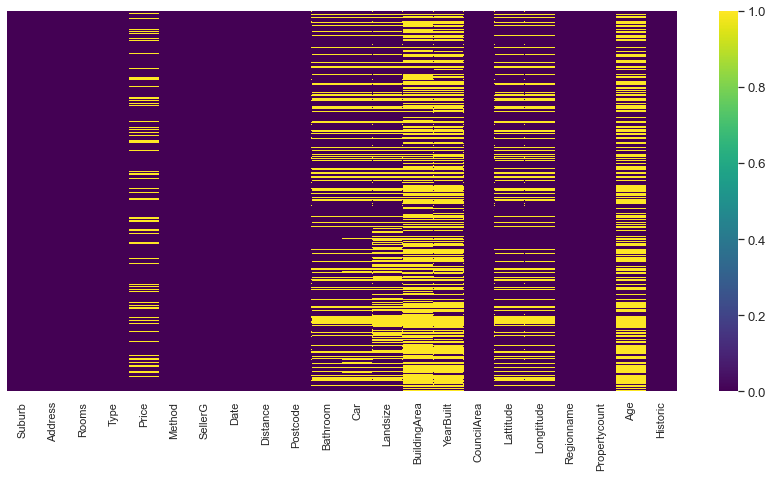

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(df.isnull(), yticklabels=False,cmap='viridis')

In [14]:
# Count of missing values
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Age              19306
Historic             0
dtype: int64

The raw data shows a lot of missing values in Price, Bathroom, Car, Landsize, BuildingArea, CouncilArea, Lattitude,  Longtitude, and age_house.

Now let's convert these into percentage.

In [15]:
# Percentage of missing values
df.isnull().sum()/len(df)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
Age              55.386293
Historic          0.000000
dtype: float64

There is a high percentage of missing date for the following column: Price, Bathroom, Car, Landsize, Building Area, YearBuilt, Council Area, Lattitude, Longitude, and age_house. 

To allow for a better model, the missing values will be removed from the dataset.

We will remove the 22% missing data from price and impute the missing data for the other variables in the model.

**Remove Missing Values**

Here we are removing the missing values from only the dependent variable price.

In [16]:
df.dropna(how='all', subset=['Price'])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,NaN,Contemporary
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,117.0,Historic
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,117.0,Historic
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/3/2017,2.5,3067.0,...,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,NaN,Contemporary
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/6/2016,2.5,3067.0,...,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,3.0,Contemporary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,NaN,Contemporary
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,-1.0,Contemporary
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,17.0,Contemporary
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,NaN,Contemporary


**Check for Outliers**




In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01


A closer look at the summary statistics indicates 0 values for Landsize, and BuildingArea. This is rather odd as it is difficult to imagine a land size or building area with 0 value.

age-house also has a max alue of 8.2.

These variables needs to be investigted further to determine if they should be in the model.

In [18]:
df[df['Age']>800]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,24/06/2017,14.2,3149.0,...,807.0,117.0,1196.0,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366.0,821.0,Historic


In [19]:
df[df['Landsize']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,NaN,Contemporary
17,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,0.0,NaN,NaN,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019.0,NaN,Contemporary
23,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,12/11/2016,2.5,3067.0,...,0.0,NaN,NaN,Yarra City Council,-37.81100,145.00670,Northern Metropolitan,4019.0,NaN,Contemporary
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,...,0.0,94.00,2009.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0,8.0,Contemporary
29,Abbotsford,7/20 Abbotsford St,1,u,441000.0,SP,Greg,14/05/2016,2.5,3067.0,...,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019.0,NaN,Contemporary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19696,Surrey Hills,6/91 Warrigal Rd,3,u,1050000.0,PI,hockingstuart,29/07/2017,10.2,3127.0,...,0.0,NaN,NaN,Boroondara City Council,-37.83358,145.09884,Southern Metropolitan,5457.0,NaN,Contemporary
19710,Tullamarine,9/200 Melrose Dr,2,u,300000.0,SP,Jason,29/07/2017,12.9,3043.0,...,0.0,66.32,1980.0,Brimbank City Council,-37.69815,144.88019,Western Metropolitan,3296.0,37.0,Contemporary
19725,West Footscray,12/102 Cross St,2,u,NaN,SP,Jas,29/07/2017,6.4,3012.0,...,0.0,92.00,NaN,Maribyrnong City Council,-37.80029,144.87859,Western Metropolitan,5058.0,NaN,Contemporary
19734,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,0.0,35.64,1967.0,Hobsons Bay City Council,-37.85588,144.89936,Western Metropolitan,6380.0,50.0,Historic


In [20]:
df[df['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,4/3/2017,2.3,3051.0,...,215.0,0.0,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821.0,17.0,Contemporary
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,3/9/2017,9.7,3104.0,...,743.0,0.0,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809.0,68.0,Historic
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,3/9/2017,12.1,3083.0,...,542.0,0.0,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175.0,47.0,Contemporary
20038,Heidelberg Heights,8 Thames St,3,h,NaN,SN,Miles,3/9/2017,8.8,3081.0,...,658.0,0.0,1920.0,Banyule City Council,-37.75287,145.05547,Eastern Metropolitan,2947.0,97.0,Historic
20223,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,Raine,3/9/2017,20.6,3064.0,...,504.0,0.0,2000.0,Hume City Council,-37.61419,144.93448,Northern Metropolitan,5833.0,17.0,Contemporary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32936,Wollert,42 Rhone Dr,4,h,722500.0,S,LJH,17/02/2018,25.5,3750.0,...,512.0,0.0,NaN,Whittlesea City Council,-37.61971,145.02910,Northern Metropolitan,2940.0,NaN,Contemporary
33397,Greenvale,26 Perugia Av,4,h,677000.0,S,Ray,17/03/2018,20.4,3059.0,...,312.0,0.0,2013.0,Hume City Council,-37.62439,144.88629,Northern Metropolitan,4864.0,4.0,Contemporary
33660,Preston,91 Dundas St,3,h,950000.0,PI,Spencer,17/03/2018,8.4,3072.0,...,301.0,0.0,1935.0,Darebin City Council,-37.75302,145.00948,Northern Metropolitan,14577.0,82.0,Historic
33899,Wollert,40 Whitebark St,4,h,615000.0,S,HAR,17/03/2018,25.5,3750.0,...,392.0,0.0,2015.0,Whittlesea City Council,-37.61252,145.04288,Northern Metropolitan,2940.0,2.0,Contemporary


After external research, it turned out that zero for land slide is indicative of 'zero-lot-line' houses in residential real estate. This is valid variable and will be kept in the data.
BulildingArea = 0 because it is not possible for a lot size to be zero.

The price outlier of $8.4 million seems to be an error and will be removed. 



In [21]:
# Remove outlier
df = df[df['BuildingArea']!=0]

# Confirm removal
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34781.0,3.030304e+00,0.969934,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27186.0,1.050130e+06,641416.528118,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34780.0,1.118049e+01,6.785558,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34780.0,3.115999e+03,108.887843,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bathroom,26555.0,1.624666e+00,0.724496,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26055.0,1.728651e+00,1.010719,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,22991.0,5.935641e+02,3402.807307,0.00000,224.00000,520.0000,6.700000e+02,4.330140e+05
BuildingArea,13666.0,1.611476e+02,402.202853,0.01000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15477.0,1.965251e+03,37.345333,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,26805.0,-3.781068e+01,0.090175,-38.19043,-37.86295,-37.8077,-3.775415e+01,-3.739020e+01


**EXPLORATORY ANALYSIS**

**Descriptive Statistics**



**Univariate Analysis of the Dependent Variables**

The dependent variable is price. 

The majority of the homes are between 900 K to 1 million. 

A few of the outliers homes are aournd $8 million.


In [22]:
def distplay(feature):
    sns.distplot(df[feature])
def catplay(feature):
    cat_counts = df[feature].value_counts()
    sns.barplot(cat_counts.index, cat_counts)
    print("Mean of %s: %.3f" % (feature, df[feature].mean()))
    print("Mode of %s: %.3f" % (feature, df[feature].mode()))

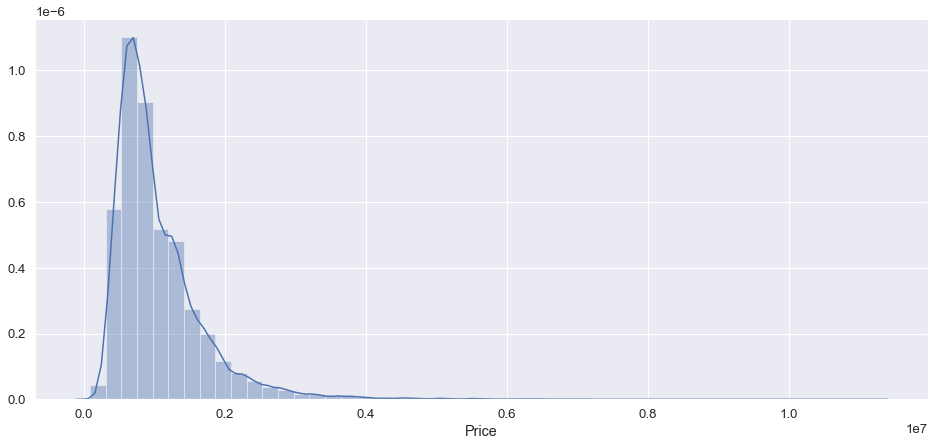

In [23]:
##More condence format of teh data using SNS distplay
plt.figure(figsize=(16,7))
distplay('Price')

https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c


**Logarithmic Transaformation of Price**

The pricing data is skewed. Let's transform it to a normal distribution.


Text(0.5, 0, 'Price')

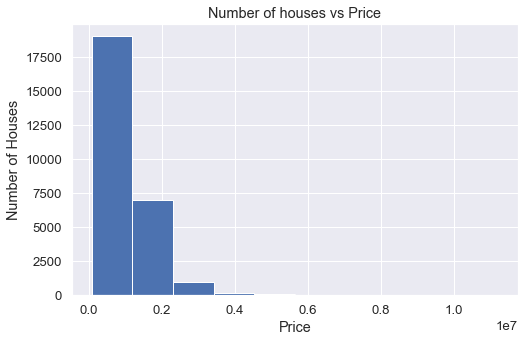

In [24]:
df.hist('Price',figsize=(8,5))
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")

Text(0.5, 0, 'log(Price)')

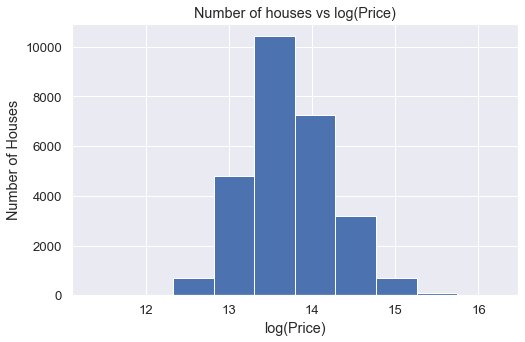

In [25]:
df['log_price'] = np.log(df['Price'])

df.hist('log_price',figsize=(8,5))
plt.title('Number of houses vs log(Price)')
plt.ylabel('Number of Houses')
plt.xlabel("log(Price)")

**Bivariate Analysis of the Independent Variables**

**Categorical Variables**

Based on the information below, we have the following are categgorical variables: 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', and 'Regionname' 

The Date variable will need to be converted to a date object.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34781 entries, 0 to 34856
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34781 non-null  object  
 1   Address        34781 non-null  object  
 2   Rooms          34781 non-null  int64   
 3   Type           34781 non-null  object  
 4   Price          27186 non-null  float64 
 5   Method         34781 non-null  object  
 6   SellerG        34781 non-null  object  
 7   Date           34781 non-null  object  
 8   Distance       34780 non-null  float64 
 9   Postcode       34780 non-null  float64 
 10  Bathroom       26555 non-null  float64 
 11  Car            26055 non-null  float64 
 12  Landsize       22991 non-null  float64 
 13  BuildingArea   13666 non-null  float64 
 14  YearBuilt      15477 non-null  float64 
 15  CouncilArea    34778 non-null  object  
 16  Lattitude      26805 non-null  float64 
 17  Longtitude     26805 non-null  

**Feature Selection of Categorical Variables**

Suburb, Address, Postcode, more or less are measures base on locations. To capture all of them and to avoid-over fitting, Regionname will be a better proxy to measure location and for better model fit.


Based on domain knowledge, a home's real estate agent or council member has a minimal effect on a price relative to other features and will be excluded from further analysis.



In [27]:
##Identify the categorical variables
df.select_dtypes(['category']).columns

Index(['Historic'], dtype='object')

In [28]:
# Convert to date object
df['Date'] = pd.to_datetime(df['Date'])

In [29]:
# Abbreviate Regionname categories
df['Regionname'] = df['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

**Step 1: Visualization**

Using visualization, you should be able to judge which feature variables have a linear relatinship with the dependent variable.

**Plot Categorical Variables with Independent Variable**

Note, Price is the dependnet variable in the model


We will only use **Type, Method, Regionname, and Historic** as categorical features.


Text(0.5, 1.0, 'Historic v Price')

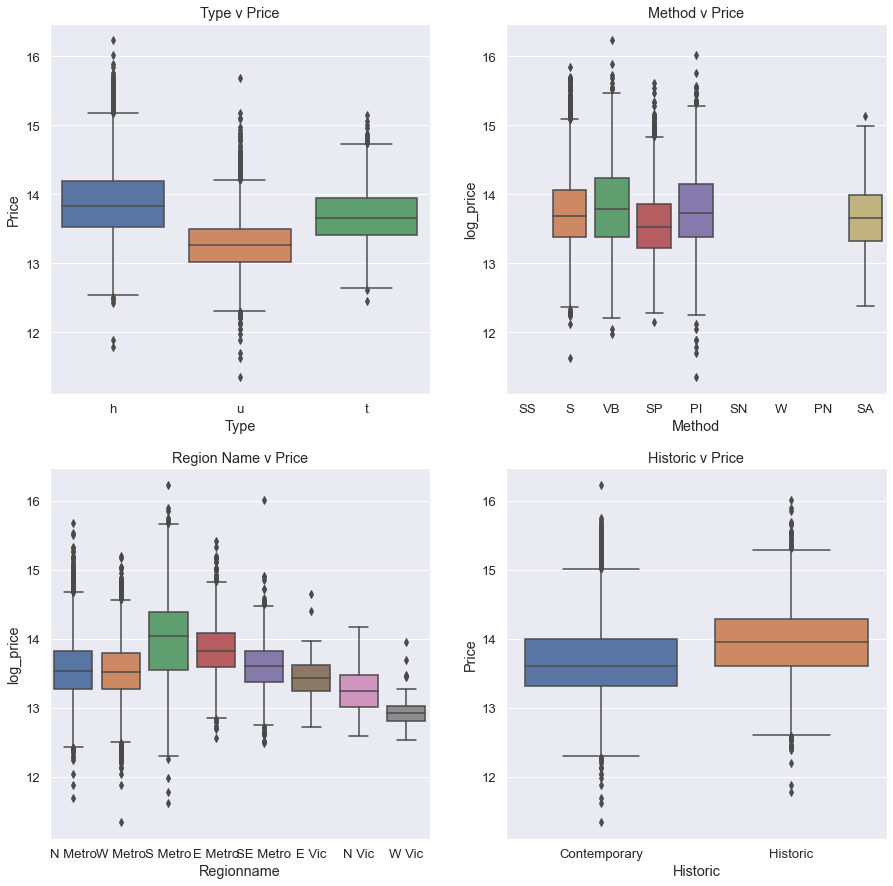

In [30]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))
# Plot [1]
sns.boxplot(data = df, x = 'Type', y = 'log_price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

# plot 2
sns.boxplot(x = 'Method', y = 'log_price', data = df, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method v Price')

# Plot [1,0]
sns.boxplot(x = 'Regionname', y = 'log_price', data = df, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name v Price')

# Plot [1,1]
sns.boxplot(x = 'Historic', y = 'log_price', data = df, ax = axes[1,1])
axes[1,1].set_xlabel('Historic')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Historic v Price')


**Key Insights**

 -the median prices for houses in approximately  1 million. About 50 percent  of houses are within the 1 million to  1.5 million median range. Townhouses are between the  800K to  900K range, while Units are about  500K.
 
 - The median price base on selling methods are about 1 million. The price are condensed between $1.5 to $2 million for all selling method except for Vendor Bid (VB). 
 
 
 - Median prices in the metro region are the highers. Prices are highest in Southern Metro at ~ 1.4. Eastern and Western Victoria has the losest median price $1 million.
 
 
 - Older Historia homes (> 50 years old) median price is ~ 1 million. Median price for Contempory houses is ~ 800K. 

  



Now lets do a correlation to see which ones contribute to price

**Plot Numerical Variables**

In [31]:
# Identify numeric variables
df.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age', 'log_price'],
      dtype='object')

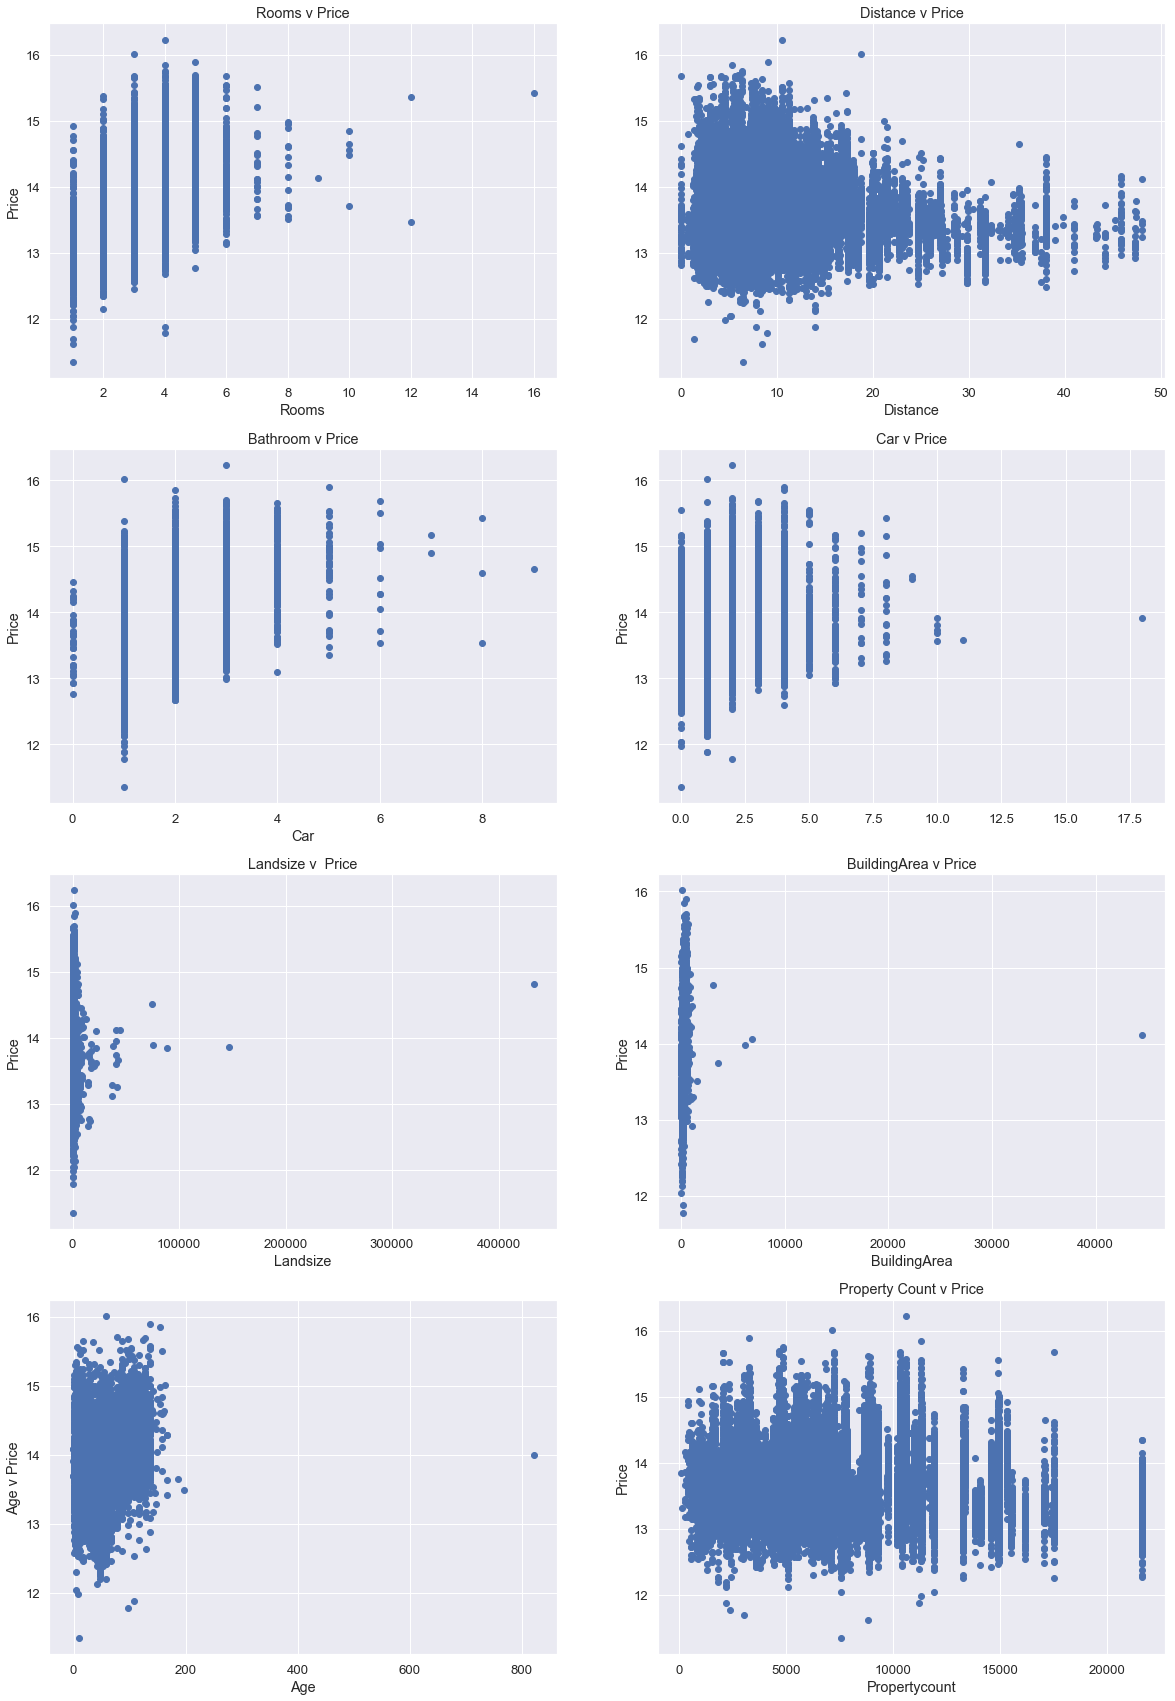

In [32]:
# Plots of numeric variables with price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))
# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'log_price', data = df, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'log_price', data = df, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'log_price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'log_price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'log_price', data = df, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'log_price', data = df, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('Price')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'log_price', data = df,edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'log_price', data = df, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
axes[3,1].set_ylabel('Price')         
axes[3,1].set_title('Property Count v Price')

plt.show()

The relationship between distance and price, car and price, and bathroom and  is not clear. 

Let's use Implot with the overlaid regression line to see the relationship a bit clearler.

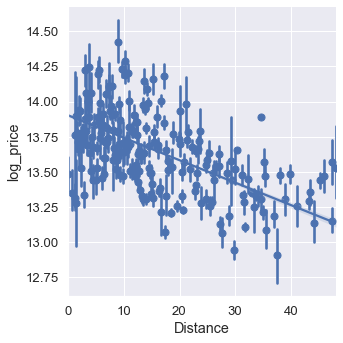

In [33]:
sns.lmplot(x="Distance", y="log_price", data=df, x_estimator=np.mean);

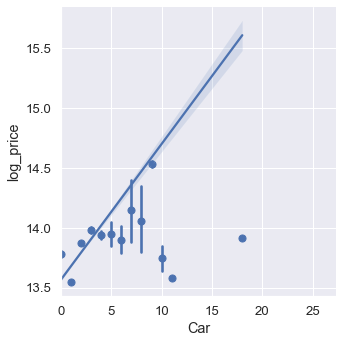

In [34]:
sns.lmplot(x="Car", y="log_price", data=df, x_estimator=np.mean);

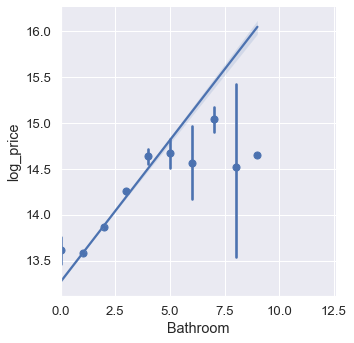

In [35]:
sns.lmplot(x="Bathroom", y="log_price", data=df, x_estimator=np.mean);

**Lattitude and Longitude**

Let's plot Lattitude and Longitude to see if there is any observable relationship.

As you can see from both the scatterplot and correlation below, there is no discernable pattern. 
As a matter of fact, there is very minimial variation with Longtitue, Lattitude and Price.
There is no visable patter in the plot that will help with the regression model in predicting price.



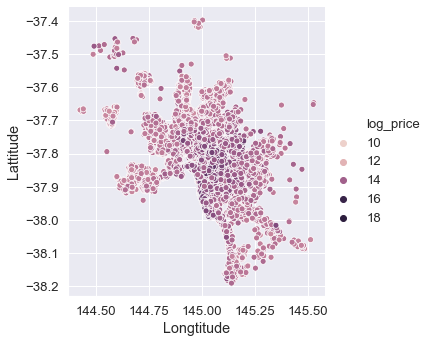

In [36]:
sns.relplot (x='Longtitude', y ='Lattitude', hue = 'log_price', data=df)

In [37]:
cc = df[["log_price", "Lattitude"]].corr()
print(cc)

           log_price  Lattitude
log_price   1.000000  -0.237854
Lattitude  -0.237854   1.000000


In [38]:
cc = df[["log_price", "Longtitude"]].corr()
print(cc)

            log_price  Longtitude
log_price    1.000000    0.252057
Longtitude   0.252057    1.000000


**More Insights**

There is an inverse relationship between distance and price. Prices are lower as one moves away from the CBD

An increase in car lots leads to an increase in prices.

More bathrooms leads to an increase in prices. 

**Key Insights**

* The majority of homes have 4 to 5 bedrooms and carries the highest price tag. 
* Homes closer to the city center is more expensive. The most expensive home (> 2M) is closer to the CBD
* Homes with 3 to 4 car garage are more expensive
* Homes with 3 to 4 bathrooms are more expensive
* Homes are clustered with  smaller lotsize and land space; price ranges from  2M to  4M
* Houses > 100 years are more expensive. 




**Drop String Variables**

There are string variables that does not contribute to the model.

Cannot use mean strategy with non-numeric data.

I will drop these string variables.

In [39]:
# dropping passed columns 
df.drop(['Suburb', 'Address','Type', 'Method', 'SellerG','Date', 'Postcode', 
'Regionname', 'Historic', 'CouncilArea', 'Price'], axis = 1, inplace = True) 
  
# display 
df

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Age,log_price
0,2,2.5,1.0,1.0,126.0,NaN,NaN,-37.80140,144.99580,4019.0,NaN,NaN
1,2,2.5,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0,NaN,14.207553
2,2,2.5,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0,117.0,13.849912
3,3,2.5,2.0,1.0,0.0,NaN,NaN,-37.81140,145.01160,4019.0,NaN,NaN
4,3,2.5,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0,117.0,14.197366
...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,6.3,1.0,3.0,593.0,NaN,NaN,-37.81053,144.88467,6543.0,NaN,14.207553
34853,2,6.3,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826,6543.0,-1.0,13.696727
34854,2,6.3,1.0,2.0,220.0,120.0,2000.0,-37.82286,144.87856,6543.0,17.0,13.465953
34855,3,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6543.0,NaN,13.946539


**IMPUTATION**

**Handling Missing Values**

Now that outliers are remove, let's handle the missing values.

There are a few ways to handle missing values:

**Drop Colums** with missing values - droping is only advice if missing values are few (say 0.01 -0.5% of the data).

**Imputation** - fill in missing value with the mean, median, or mode.

Here, we will use imputation. the default behaviour fills in the mean value for the imputation.

It is important to remove the missing values before imputation otherwise the mean will be skewed.

In [40]:
df['log_price'] =df['log_price'].transform(lambda x: x.fillna(x.mean()))

In [41]:
df['Rooms'] =df['Rooms'].transform(lambda x: x.fillna(x.mean()))

In [42]:
df['Distance'] =df['Distance'].transform(lambda x: x.fillna(x.mean()))

In [43]:
df['Bathroom'] =df['Bathroom'].transform(lambda x: x.fillna(x.mean()))

In [44]:
df['Car'] =df['Car'].transform(lambda x: x.fillna(x.mean()))

In [45]:
df['Landsize'] =df['Landsize'].transform(lambda x: x.fillna(x.mean()))

In [46]:
df['BuildingArea'] =df['BuildingArea'].transform(lambda x: x.fillna(x.mean()))

In [47]:
df['YearBuilt'] =df['YearBuilt'].transform(lambda x: x.fillna(x.mean()))

In [48]:
df['Lattitude'] =df['Lattitude'].transform(lambda x: x.fillna(x.mean()))

In [49]:
df['Longtitude'] =df['Longtitude'].transform(lambda x: x.fillna(x.mean()))

In [50]:
df['Propertycount'] =df['Propertycount'].transform(lambda x: x.fillna(x.mean()))

In [51]:
df['Age'] =df['Age'].transform(lambda x: x.fillna(x.mean()))

In [52]:
df.describe()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Age,log_price
count,34781.000000,34781.000000,34781.000000,34781.000000,34781.000000,34781.000000,34781.000000,34781.000000,34781.000000,34781.000000,34781.000000,34781.000000
mean,3.030304,11.180489,1.624666,1.728651,593.564134,161.147626,1965.251018,-37.810676,145.001824,7572.403215,51.748982,13.722717
std,0.969934,6.785461,0.633047,0.874788,2766.572486,252.107158,24.911559,0.079163,0.105514,4428.862124,24.911559,0.457044
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1196.000000,-38.190430,144.423790,83.000000,-89.000000,11.350407
25%,2.000000,6.400000,1.000000,1.000000,357.000000,160.000000,1965.251018,-37.846880,144.964460,4385.000000,51.748982,13.451667
50%,3.000000,10.300000,1.624666,1.728651,593.564134,161.147626,1965.251018,-37.810676,145.001824,6763.000000,51.748982,13.722717
75%,4.000000,14.000000,2.000000,2.000000,598.000000,161.147626,1965.251018,-37.770920,145.051700,10412.000000,51.748982,13.955273
max,16.000000,48.100000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000,821.000000,16.231424


In [53]:
df_mean_imputed = df.fillna(df.mean())
df_mean_imputed

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Age,log_price
0,2,2.5,1.000000,1.000000,126.000000,161.147626,1965.251018,-37.801400,144.995800,4019.0,51.748982,13.722717
1,2,2.5,1.000000,1.000000,202.000000,161.147626,1965.251018,-37.799600,144.998400,4019.0,51.748982,14.207553
2,2,2.5,1.000000,0.000000,156.000000,79.000000,1900.000000,-37.807900,144.993400,4019.0,117.000000,13.849912
3,3,2.5,2.000000,1.000000,0.000000,161.147626,1965.251018,-37.811400,145.011600,4019.0,51.748982,13.722717
4,3,2.5,2.000000,0.000000,134.000000,150.000000,1900.000000,-37.809300,144.994400,4019.0,117.000000,14.197366
...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,6.3,1.000000,3.000000,593.000000,161.147626,1965.251018,-37.810530,144.884670,6543.0,51.748982,14.207553
34853,2,6.3,2.000000,1.000000,98.000000,104.000000,2018.000000,-37.815510,144.888260,6543.0,-1.000000,13.696727
34854,2,6.3,1.000000,2.000000,220.000000,120.000000,2000.000000,-37.822860,144.878560,6543.0,17.000000,13.465953
34855,3,6.3,1.624666,1.728651,593.564134,161.147626,1965.251018,-37.810676,145.001824,6543.0,51.748982,13.946539


**Correlation**

Let's explore further to see which variables are correlated with each other.

Text(0.5, 1.0, 'Correlation Matrix')

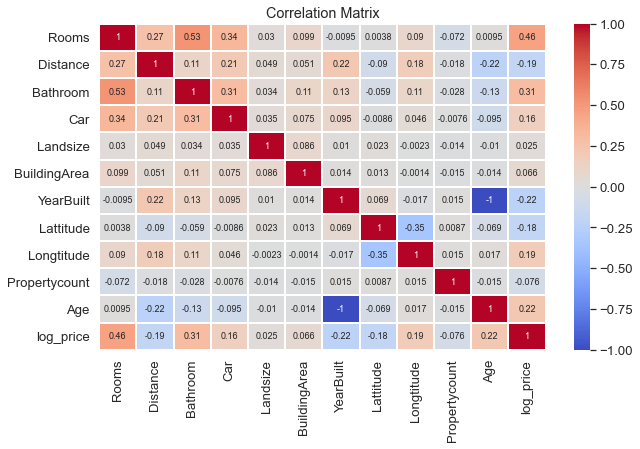

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Correlation Matrix')

**Insights**

Moderate Correlation

    Room is moderately correlated with price
    Bathroom is moderately corelated with price
 
Weak Correlation

    Distance, Car, and land Landsize are all weakly correlated with price

    Lattitude, Longtitude, and Year build are also weakly correlated with price

Multicollinearity Bathrooms and rooms  have moderately strong correlation (.>.60)

Interestingly enough, there is a perfect inverse relationship between YearBuilt and Price.


**Detecting Multiplecolinearity Using VIF**

"Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables."

"VIF score of an independent variable represents how well the variable is explained by other independent variables."


* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others


 ” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. “

    or
 VIF score of an independent variable represents how well the variable is explained by other independent variables.



Source: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

In [55]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [56]:
X =df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Rooms,1.591166e+00
1,Distance,1.211610e+00
2,Bathroom,1.494023e+00
3,Car,1.186228e+00
4,Landsize,1.011009e+00
5,BuildingArea,1.023236e+00
6,YearBuilt,1.876784e+06
7,Lattitude,1.153405e+00
8,Longtitude,1.174700e+00
9,Propertycount,1.006699e+00


**VIF Results**

As you can see from above, the VIF for all the variables are low.
None of the variables has a VIF exceeding 5. 

**MODEL BUILDING**




**Model Evaluation with Statsmodel**

In [57]:
y = df['log_price']
x1 =df[['Rooms','Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age']]

In [58]:
x = sm.add_constant (x1)
results = sm.OLS(y,x).fit()
results.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     2402.
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:09:34   Log-Likelihood:                -12985.
No. Observations:               34781   AIC:                         2.599e+04
Df Residuals:                   34770   BIC:                         2.608e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.459e-05   1.31e-06    -41.793      0.000   -5.71e-05    -5.2e-05
Rooms             0.2257      0.002     92.080      0.000       0.221       0.231
Distance         -0.0234      0.000    -76.514      0.000      -0.024      -0.023
Bathroom          0.0478      0.004     13.129      0.000       0.041       0.055
Car               0.0299      0.002     12.750      0.000       0.025       0.035
Landsize       4.255e-06   6.85e-07      6.212      0.000    2.91e-06     5.6e-06
BuildingArea   4.789e-05   7.56e-06      6.332      0.000    3.31e-05    6.27e-05
YearBuilt        -0.0563      0.001    -42.887      0.000      -0.059      -0.054
Lattitude        -0.8829      0.026    -34.525      0.000      -0.933      -0.833
Longtitude        0.6436      0.019     33.243      0.000       0.606       0.682
Propertycount -4.509e-06   4.27e-07    -10.560      0.000   -5.35e-06   -3.67e-06
Age              -0.0538      0.001    -40.669      0.000      -0.056      -0.051
==============================================================================
Omnibus:                     1146.004   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1925.668
Skew:                           0.294   Prob(JB):                         0.00
Kurtosis:                       3.992   Cond. No.                     2.14e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.07e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Results**

The adjusted R-square is 40% - meaning that the model only explained 40% of the variance.

All of the variables are statistically significant at the p = 0.05 level.

There is strong evidence to reject the null-hypothesis H0.

All of the varaibles are statistically significant in explaination variation in Price.

Buyers put a lot of emphasis on car lots and the number of rooms when deciding to purchase a home.

There is an invese relationship between distance and Price. Hose price decrease further away from the CBD.



**STEP 2: SK LEARN - SETTING VARIABLES**

**Model Evaluation with scikit-learn**

In [59]:
##Assigned feature colums as a list:X
#Assign to y the response variable 
y = df['log_price']
X=df[['Rooms','Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age']]

In [60]:
X.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Age
0,2,2.5,1.0,1.0,126.0,161.147626,1965.251018,-37.8014,144.9958,4019.0,51.748982
1,2,2.5,1.0,1.0,202.0,161.147626,1965.251018,-37.7996,144.9984,4019.0,51.748982
2,2,2.5,1.0,0.0,156.0,79.000000,1900.000000,-37.8079,144.9934,4019.0,117.000000
3,3,2.5,2.0,1.0,0.0,161.147626,1965.251018,-37.8114,145.0116,4019.0,51.748982
4,3,2.5,2.0,0.0,134.0,150.000000,1900.000000,-37.8093,144.9944,4019.0,117.000000


In [61]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(34781, 11)


In [62]:
y.head()

0    13.722717
1    14.207553
2    13.849912
3    13.722717
4    14.197366
Name: log_price, dtype: float64

In [63]:
print('The shape of our features is:', df.shape)

The shape of our features is: (34781, 12)


In [64]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(34781,)


**STEP 3: SK LEARN - SPLITTING THE DATA**

Splitting X and y into train and test sets:

By passing our X and y variables into the train_test_split method, we are able to capture the splits in data by assigning 4 variables to the result.

**Data Partition**


Let’s partition the data and start modeling.

train_test_split() returns four objects:

    X_train is the subset of our features used for training.
    X_test is the subset which will be our ‘hold-out’ set – what we’ll use to test the model.
    y_train is the target variable SalePrice which corresponds to X_train.
    y_test is the target variable SalePrice which corresponds to X_test.


**Begin Modelling**

Let's first create the Linear Regression model.

In [65]:
# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [66]:
# Note by default, the  split is 75% for training and 25% for testing.
#Here the test size is 20% and train size is 80%
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27824, 11)
(6957, 11)
(27824,)
(6957,)


**Let's read the Shape of both the Training and Testing Samples**

In [67]:
print('Training Features Shape:',X_train.shape )
print('Training Outcome Shape:',X_test.shape)
print('Testing Features Shape:',y_train.shape)
print('Testing Outcome Shape:',y_test.shape)

Training Features Shape: (27824, 11)
Training Outcome Shape: (6957, 11)
Testing Features Shape: (27824,)
Testing Outcome Shape: (6957,)


**STEP 4: SK LEARN - TRAINING THE MODEL**

**Model Fitting**

Let's fit the model. 

We are estimating the relatiionship between the independnet variables and the target variable to make accurate predictions.



In [68]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression()

**STEP 5: INTERPRETING COEFFICIENTS**

In [69]:
###print y-intercept
print(regressor.intercept_)

-113.42068813478686


In [70]:
###print beta coefficients
print(regressor.coef_)

[ 2.27943379e-01 -2.40196424e-02  4.53532670e-02  2.95185890e-02
  9.07539035e-06  3.84524310e-05 -1.28249821e-03 -8.98946370e-01
  6.55725096e-01 -4.09929285e-06  1.28249821e-03]


In [71]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
zip(X, regressor.coef_)

In [72]:
##Coefficient in table format
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,0.227943
Distance,-0.024020
Bathroom,0.045353
Car,0.029519
Landsize,0.000009
BuildingArea,0.000038
YearBuilt,-0.001282
Lattitude,-0.898946
Longtitude,0.655725
Propertycount,-0.000004


**The top predictive features that we see here are very plausible**

At the very top there are Rooms, Distance, Bathroom, Car and Longititude that are associated with higher price. 

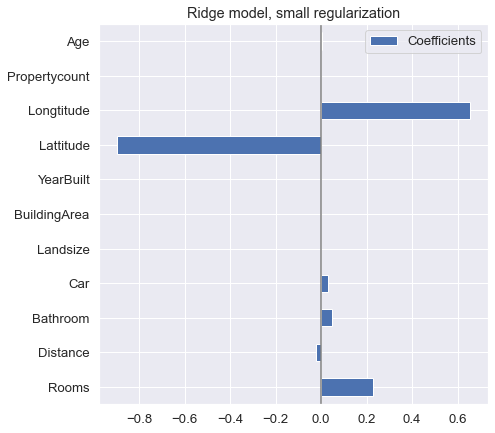

In [73]:
cdf.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model, small regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

A closer look at the plot figure above shows that longtitude is the most important factor that affects house price.

the number of rooms, bathrooms, and car lots are also significant in house price.

**STEP 6: MAKING PREDICTIONS**

Making prediction is base on the code below - passing the predict method with your test data.

This will return the predicted values of y given the text X data.


In [74]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)

**STEP 7: MODEL EVALUATOIN**

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

There are three primary metrics to evaluate regression models:
 - Mean absolute error (MAE)
 - Mean squared error (MSE), or
 - Root mean squared error (RMSE).
 
 MAE: The easiest to understand. Represents average error

MSE: Similar to MAE but noise is exaggerated and larger errors are “punished”. It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular.

RMSE: Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model.

source: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606

In [75]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.2740532210562559
MSE: 0.12576627959255576
RMSE: 0.3546354178484656


RMSE shows how much the model prediction deviate form the actual value. In this case, the predicted value is $354,635 away from the actual value.

In [76]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.38563082217029254


The feature variables only explaned 39% of the variance.

Interpreting the RMSE is somewhat more intuitive than the r-squared value. 

The RMSE measures the distance between our predicted values and actual values.

We can view this relationship graphically with a scatter plot.

**Calculate the RSME and R_Square for the Test and Train Data**


In [77]:
pred_train_regressor= regressor.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,pred_train_regressor)))
print('R^2 =',metrics.explained_variance_score(y_train,pred_train_regressor))

pred_test_regressor= regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_test_regressor))) 
print('R^2 =',metrics.explained_variance_score(y_test,pred_test_regressor))        

0.35103288651956105
R^2 = 0.41294764870228795
0.3546354178484656
R^2 = 0.38563082217029254


**STEP 8: ANALYZE THE RESIDUALS**

Plot one sows the prediction with the alpha set at .7

Plot two shows a regular residual plot without the alpha.

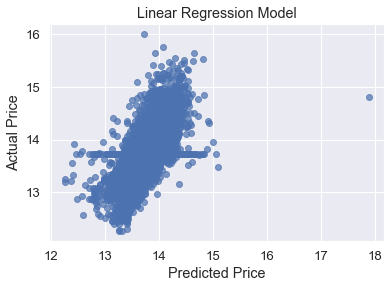

In [78]:
actual_values = y_test
plt.scatter(y_pred, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

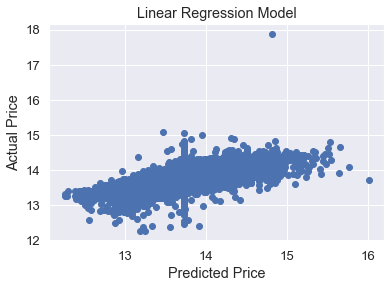

In [79]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

If our predicted values were identical to the actual values, this graph would be the straight line y=x because each predicted value x would be equal to each actual value y.

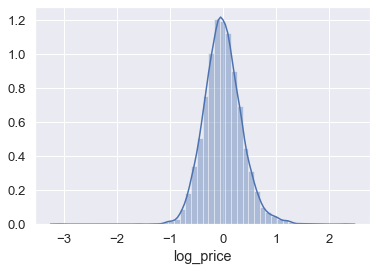

In [80]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))

In [81]:
df_mean_imputed = pd.DataFrame({'Actual': np.round(y_test, 2), 
                   'Predicted': np.round(y_pred, 2)})
df_mean_imputed.head(10)

,Actual,Predicted
6938,13.72,13.68
24367,13.72,13.58
17627,13.12,13.00
18568,13.20,13.35
32870,14.08,13.41
8326,13.29,13.66
29199,14.00,13.53
7357,13.83,13.66
1034,13.72,14.13
1759,13.72,13.54


**Conclusion**

The model has weak adjusted r-square.

40% of the variane in house prices aere exlplained by the model.

the number of bathroms and car lots are significant variables in house price.

Distance has an invesere relationship with house price. The farther away from the CBD, the less expensive is the price of a house.


**RANDOM FOREST**

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

**Feature Scaling**

In [83]:
# Feature scaline
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the Model**

Let's use x_train and y_train to train the random forst model by using the *fit* method.


In [84]:
# Instantiate model with 20 decision trees
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0) 
# Train the model on training data
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

**Make Prediction on the Test Set**

To make prediction, we can use the predict method and pass *x_test* as a parameter to get the output as *y_pred*

Note that the prediction output is an array of real number corresponding tot he input array.

In [85]:
# Use the forest's predict method on the test data
y_pred = regressor.predict(X_test)
y_pred

array([14.06278597, 13.57213732, 13.3103683 , ..., 13.70891221,
       14.15805256, 14.00753808])

**Making Prediction with the Model**

In [86]:
errors =abs(y_pred-y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'price.')

Mean Absolute Error: 0.22 price.


Our average estimate of price is off by .22

We don't have a baseline to compare the price. 

However, the small amount can still represent thousands of dollars.

**Model Evaluation**

The final step is to check how the model is performing on the test data.

To do this, we will evaluate the model using the RMSE.


In [87]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

def metrics_(y_test,y_pred, X_train, y_train):
    
    ## MAE, RMSE & MSE
    MAE_test   = metrics.mean_absolute_error(y_test, y_pred)
    MSE_test   = metrics.mean_squared_error(y_test, y_pred)
    
    ## Rsq
    R2_test    = metrics.explained_variance_score(y_test,pred_test_regressor)
    
    all_       = [MAE_test, MSE_test, R2_test]
    
    return all_

Mean Absolute Error: 0.21942526378068855
Mean Squared Error: 0.08871208269930946
Root Mean Squared Error: 0.2978457364128442


With 20 trees, the RSME is 301,502.


**RSME and R_Square for both train and test sets**

In [88]:
pred_train_regressor= regressor.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,pred_train_regressor)))
print('R^2 =',metrics.explained_variance_score(y_train,pred_train_regressor))

pred_test_regressor= regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_test_regressor))) 
print('R^2 =',metrics.explained_variance_score(y_test,pred_test_regressor)) 

0.1632247368139623
R^2 = 0.8730745878897953
0.2978457364128442
R^2 = 0.5668006280848192


The RMSE is 302, 409 and is not far away from the RMSE in the linear regression model.

**Accuracy**

To put our predictions in perspective, let's calculate the  accuracy.

In [89]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors /y_test)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.41 %.


This looks pretty good. The model has learn to predict the price of a single house in Melbourne with 98% accuracy.


**Conclusion**

Using Random Forest, the accurance of the model is 98.41%. This is not bad and significies that the model can predict price of houses in Melbourne with 98% accuracy. Note also that the RSME for both the train (163,224) and test (297,845) decreased from the linear regression value.

Another important point is that the R-square for the train set increased to 87%, while the R-Square for the test set was 57%.


**LOG TRANSFORM BY REVERSING THE DEPENDENT VARIABLE**

We need to use np.exp() on our predicted sale prices to reverse the log transformation before submitting anything! Otherwise we will have distorted and low values.

Let's create a new dataframe


**New Dataframe**

In [90]:
testset = pd.read_csv('real_estate_aus.csv')

In [91]:
# Run the model's prediction method on the test dataset
predictions = regressor.predict(X_test)
predictions[predictions<0] = 0

In [92]:
#Reverse log transformation of sale prices
predictions = np.expm1(predictions)

**Examine the inverse transformed data to see if there are any infinite or negative data**

In [93]:
predictions.min()

275050.1369929076

In [94]:
predictions.max()

3234506.0688829357

In [95]:
list(predictions).count('inf')

0

In [96]:
list(predictions).count(-1)

0

In [97]:
len(predictions)

6957

**SKlearn**

In [98]:
# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [99]:
print('Training Features Shape:',X_train.shape )
print('Training Outcome Shape:',X_test.shape)
print('Testing Features Shape:',y_train.shape)
print('Testing Outcome Shape:',y_test.shape)

Training Features Shape: (27824, 11)
Training Outcome Shape: (6957, 11)
Testing Features Shape: (27824,)
Testing Outcome Shape: (6957,)


In [100]:
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression()

In [101]:
###print y-intercept
print(regressor.intercept_)

-113.42068813478686


In [102]:
###print beta coefficients
print(regressor.coef_)

[ 2.27943379e-01 -2.40196424e-02  4.53532670e-02  2.95185890e-02
  9.07539035e-06  3.84524310e-05 -1.28249821e-03 -8.98946370e-01
  6.55725096e-01 -4.09929285e-06  1.28249821e-03]


In [103]:
##Coefficient in table format
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,0.227943
Distance,-0.024020
Bathroom,0.045353
Car,0.029519
Landsize,0.000009
BuildingArea,0.000038
YearBuilt,-0.001282
Lattitude,-0.898946
Longtitude,0.655725
Propertycount,-0.000004


In [104]:
# Predicting test set results
y_pred = regressor.predict(X_test)

In [105]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.2740532210562559
MSE: 0.12576627959255576
RMSE: 0.3546354178484656


In [106]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.38563082217029254


**Calculate the RSME and R_Square for the Test and Train Data**

In [107]:
pred_train_regressor= regressor.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,pred_train_regressor)))
print('R^2 =',metrics.explained_variance_score(y_train,pred_train_regressor))

pred_test_regressor= regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_test_regressor))) 
print('R^2 =',metrics.explained_variance_score(y_test,pred_test_regressor))  

0.35103288651956105
R^2 = 0.41294764870228795
0.3546354178484656
R^2 = 0.38563082217029254


**Conclusion**

With the log transform of the dependent variable, the RMSE decreased significantly.
However, the R-Square remains more or less the same.

**RANDOM FOREST**

**Now let run the model using random forest**

In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [109]:
# Feature scaline
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [110]:
# Instantiate model with 20 decision trees
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0) 
# Train the model on training data
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [111]:
# Use the forest's predict method on the test data
y_pred = regressor.predict(X_test)
y_pred

array([14.06278597, 13.57213732, 13.3103683 , ..., 13.70891221,
       14.15805256, 14.00753808])

In [112]:
errors =abs(y_pred-y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'price.')

Mean Absolute Error: 0.22 price.


In [113]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

def metrics_(y_test,y_pred, X_train, y_train):
    
    ## MAE, RMSE & MSE
    MAE_test   = metrics.mean_absolute_error(y_test, y_pred)
    MSE_test   = metrics.mean_squared_error(y_test, y_pred)
    
    ## Rsq
    R2_test    = metrics.explained_variance_score(y_test,pred_test_regressor)
    
    all_       = [MAE_test, MSE_test, R2_test]
    
    return all_

Mean Absolute Error: 0.21942526378068855
Mean Squared Error: 0.08871208269930946
Root Mean Squared Error: 0.2978457364128442


**RSME and R_Square for both train and test sets**

In [114]:
pred_train_regressor= regressor.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,pred_train_regressor)))
print('R^2 =',metrics.explained_variance_score(y_train,pred_train_regressor))

pred_test_regressor= regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_test_regressor))) 
print('R^2 =',metrics.explained_variance_score(y_test,pred_test_regressor)) 

0.1632247368139623
R^2 = 0.8730745878897953
0.2978457364128442
R^2 = 0.5668006280848192


In [115]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors /y_test)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.41 %.


**Conclusion**

With Sklearn, the R-square for the inversion did not change much (38% and 41% respectively for both train and test data.
The RMSE was the same for both the log transformation adn the inversion (354,635).

With the inversion of the log transformation, the accuracy using the random forest mdoel decrease slightly to 98.28, while the RMSE increased slightly from 297, 846 to 298,085.



**K Fold Cross Vaildation**



In [116]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [117]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA

In [118]:
def model_fit_reports(algo,X_,y_,performCV=True, cv_folds=5):
   
    
    ## MAE, RMSE & MSE
    MAE_test   = metrics.mean_absolute_error(y_test, y_pred)
    MSE_test   = metrics.mean_squared_error(y_test, y_pred)
    
    
    #Accuracy, Precision, Recall, F1 Score
    #pred = algo.predict(X_)
    #accu = accuracy_score(y_, pred)
    #f1_  = f1_score(y_, pred)
    #rec  = recall_score(y_, pred)
    #prec = precision_score(y_, pred)

   
    #GINI & AUC
    #fpr, tpr, thresholds = roc_curve(y_, pred)
    #roc_auc = auc(fpr, tpr)
    #Gini   = 2*roc_auc - 1  
    #labels  = ['Accuracy','F1 Score', 'Recall', 'Precision', 'Gini', 'AUC']
    #values  = [accu,f1_,rec,prec,Gini,roc_auc]
   
    #all_    = pd.Series(values,labels)  
    #print(all_)
    #all_.plot(kind='bar', title='Model Fit Report')  


    if performCV:
        MAE_ = cross_val_score(algo, X_, y_, cv=cv_folds, scoring='mean_absolute_error')
        MSE_ = cross_val_score(algo, X_, y_, cv=cv_folds, scoring='mean_sqaured_error')
        
        print("AUC : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(MAE_),np.std(MAE_),np.min(MAE_),np.max(cv_score)))
        print("GINI : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(GINI),np.std(GINI),np.min(GINI),np.max(GINI)))

    cols = list(X_.columns)
    if printFeatureImportance:
        feat_imp = pd.Series(algo.feature_importances_, cols).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')    
   
    return all_

**Results of Train Data**

**Results of Test Data**